## Imports

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import scipy.sparse 

## Loading Data

### tf-idf Embeddings

In [18]:
tfidf_embeddings_train = scipy.sparse.load_npz('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_embeddings_train.npz')
tfidf_labels_train = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_labels_train.npy', allow_pickle = True)
tfidf_embeddings_test = scipy.sparse.load_npz('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_embeddings_test.npz')
tfidf_labels_test = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/tfidf_labels_test.npy', allow_pickle = True)


In [19]:
tfidf_embeddings_train

<5228x1577 sparse matrix of type '<class 'numpy.float16'>'
	with 127213 stored elements in Compressed Sparse Row format>

In [20]:
tfidf_embeddings_test

<1308x1577 sparse matrix of type '<class 'numpy.float16'>'
	with 31886 stored elements in Compressed Sparse Row format>

## Define Keras Model

In [21]:
inputs = tf.keras.layers.Input(shape=(tfidf_embeddings_train[0].shape[1],))
hidden_1_out = tf.keras.layers.Dense(300, activation='relu')(inputs)
classification_out = tf.keras.layers.Dense(4, activation='relu')(hidden_1_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

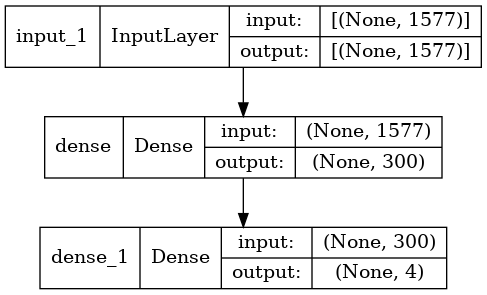

In [22]:
tf.keras.utils.plot_model(model_functional, show_shapes = True)


In [24]:
model_functional.fit(tfidf_embeddings_train, tfidf_labels_train, epochs=8, batch_size=10)


Epoch 1/8


/home/sanjaycollege15/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 300), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


523/523 [==============================] - 4s 6ms/step - loss: 1.5009 - accuracy: 0.2490
Epoch 2/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 3/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 4/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 5/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 6/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 7/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504
Epoch 8/8
523/523 [==============================] - 3s 6ms/step - loss: 1.3855 - accuracy: 0.2504


In [25]:
model_functional.evaluate(tfidf_embeddings_test, tfidf_labels_test)


41/41 [==============================] - 0s 2ms/step - loss: 1.3863 - accuracy: 0.2508


[1.3862950801849365, 0.25076451897621155]

No learning! Averaging is likely causing it to lose a lot of information